# Random Forest Regression

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:1000, 0].values.reshape(-1, 1)
y = dataset.iloc[:1000, -1].values.reshape(-1, 1)

## Taking care of missing data

In [3]:
from sklearn.impute import SimpleImputer
x_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = x_imputer.fit_transform(x)

In [4]:
y_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = y_imputer.fit_transform(y)

In [5]:
print(y)

[[33.44      ]
 [33.44      ]
 [33.437     ]
 [33.42      ]
 [33.421     ]
 [33.431     ]
 [33.44      ]
 [33.424     ]
 [33.42      ]
 [33.494     ]
 [33.51      ]
 [33.58      ]
 [33.64      ]
 [33.689     ]
 [33.847     ]
 [33.86      ]
 [33.876     ]
 [33.66829485]
 [33.926     ]
 [33.98      ]
 [33.99      ]
 [34.04      ]
 [34.056     ]
 [34.113     ]
 [34.16      ]
 [34.161     ]
 [34.21      ]
 [34.261     ]
 [34.31      ]
 [32.95      ]
 [32.94      ]
 [32.939     ]
 [32.95      ]
 [33.013     ]
 [33.24      ]
 [33.272     ]
 [33.46      ]
 [33.488     ]
 [33.6       ]
 [33.631     ]
 [33.745     ]
 [33.8       ]
 [33.833     ]
 [33.93      ]
 [33.939     ]
 [33.943     ]
 [33.95      ]
 [33.957     ]
 [34.        ]
 [34.016     ]
 [34.101     ]
 [34.16      ]
 [34.188     ]
 [34.259     ]
 [34.319     ]
 [34.34      ]
 [34.354     ]
 [34.378     ]
 [34.403     ]
 [34.429     ]
 [34.43      ]
 [32.63      ]
 [32.66      ]
 [32.66      ]
 [32.66      ]
 [32.673     ]
 [32.68   

## Splitting the data into training and test sets

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Training the model

In [7]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(x_train, y_train)

C:\Users\yrj04\AppData\Local\Temp/ipykernel_11592/3275773834.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

## Testing the model

In [8]:
y_pred = regressor.predict(x_test).reshape(-1, 1)
print(np.concatenate((y_pred, y_test), 1))

[[33.99603333 34.035     ]
 [33.38695    33.49      ]
 [33.89801667 33.957     ]
 [33.09937667 32.95      ]
 [34.2797     33.66829485]
 [34.4016     34.511     ]
 [34.18884    34.261     ]
 [33.3276     33.3       ]
 [34.2028     34.198     ]
 [33.13015    33.179     ]
 [34.267      34.31      ]
 [33.08758333 33.029     ]
 [34.10403333 34.17      ]
 [33.982      33.936     ]
 [34.20445    34.085     ]
 [34.17479187 34.34      ]
 [34.10735897 34.422     ]
 [34.12137564 34.286     ]
 [33.4722     33.847     ]
 [33.9029     33.844     ]
 [33.24513333 32.939     ]
 [33.12835    33.68      ]
 [34.4256     34.31      ]
 [32.8492     32.77      ]
 [33.2638     33.517     ]
 [33.914      34.288     ]
 [34.0796     33.943     ]
 [33.3948     33.286     ]
 [33.36641667 33.13      ]
 [33.42674667 33.44      ]
 [33.74646536 34.2       ]
 [33.22457143 33.217     ]
 [33.14208333 33.15      ]
 [34.2386     34.33      ]
 [32.9629     32.79      ]
 [33.2379     33.19      ]
 [33.5061     33.641     ]
 

## Visualizing the results

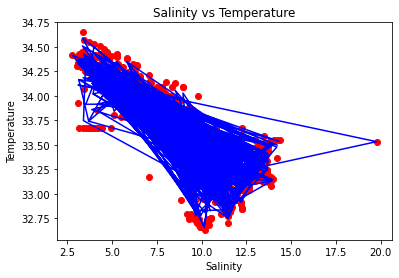

In [9]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salinity vs Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()

## Evaluating the model

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7724005128165989